In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Commented code was used to merged all dataset. Dataset for April had 3 bugged lines which are skipped

In [4]:
df = pd.read_csv("dataset/original/2016_01.csv")
for i in range(2, 13):
    if i == 4:
        df2 = pd.read_csv("dataset/original/2016_{:02d}.csv".format(i), error_bad_lines=False)
        df2 = df2[df2["MONTH"]==4]
    else:
        df2 = pd.read_csv("dataset/original/2016_{:02d}.csv".format(i))
    df = df.append(df2)

C:\Anaconda501\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'
C:\Anaconda501\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# test = pd.read_csv("2016_04.csv", error_bad_lines=False)

b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'
C:\Anaconda501\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# test01 = pd.read_csv("2016_01.csv")

In [18]:
# test = test[test["MONTH"]==4]  #to remove the wrong line
# # df = df[df["CANCELLED"]<2]
# test["MONTH"].value_counts()

4    362831
Name: MONTH, dtype: int64

In [5]:
print(len(df))
print(len(df[df["CANCELLED"]>0]))
print(len(df[df["DIVERTED"]>0]))

5518859
65219
13489


In [6]:
list(df)

['YEAR',
 'QUARTER',
 'MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'FL_DATE',
 'UNIQUE_CARRIER',
 'AIRLINE_ID',
 'CARRIER',
 'TAIL_NUM',
 'FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'ORIGIN_CITY_MARKET_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'ORIGIN_STATE_ABR',
 'ORIGIN_STATE_FIPS',
 'ORIGIN_STATE_NM',
 'ORIGIN_WAC',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DEST_CITY_MARKET_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEST_STATE_ABR',
 'DEST_STATE_FIPS',
 'DEST_STATE_NM',
 'DEST_WAC',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'DEP_DELAY_NEW',
 'DEP_DEL15',
 'DEP_DELAY_GROUP',
 'DEP_TIME_BLK',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'ARR_DELAY_NEW',
 'ARR_DEL15',
 'ARR_DELAY_GROUP',
 'ARR_TIME_BLK',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'FLIGHTS',
 'DISTANCE',
 'DISTANCE_GROUP',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LA

In [7]:
print(len(df[df["SECURITY_DELAY"]>60]))
print(len(df[df["LATE_AIRCRAFT_DELAY"]>60]))
print(len(df[df["NAS_DELAY"]>60]))
print(len(df[df["WEATHER_DELAY"]>60]))

273
120123
50667
12307


In [43]:
meteo = df[df["WEATHER_DELAY"]>60][["MONTH", "DAY_OF_MONTH", "WEATHER_DELAY"]]

In [44]:
meteo = meteo.reset_index()
meteo["DAY_OF_MONTH"] = meteo["DAY_OF_MONTH"].astype(int)

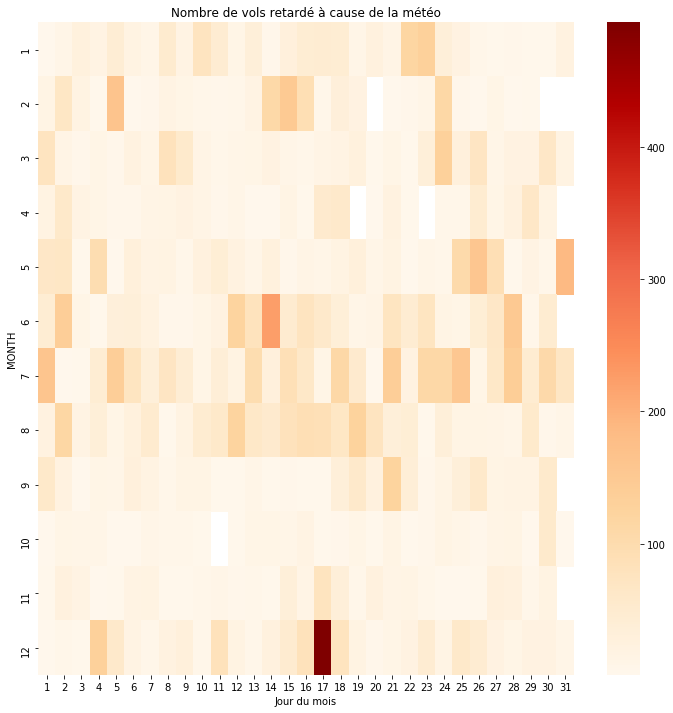

In [45]:
pivoted = meteo.groupby(["MONTH", "DAY_OF_MONTH"]).agg({
    "WEATHER_DELAY" : "count"
})
pivoted = pivoted.reset_index().pivot_table(index="MONTH", columns="DAY_OF_MONTH")

pivoted.columns = list(range(1,32))
plt.figure(figsize=(12,12))
correlation_matrix = pivoted
sns.heatmap(correlation_matrix, cmap="OrRd")
plt.title("Nombre de vols retardé à cause de la météo")
plt.xlabel("Jour du mois")
plt.savefig("img/weather_delay_count.png")
plt.show()

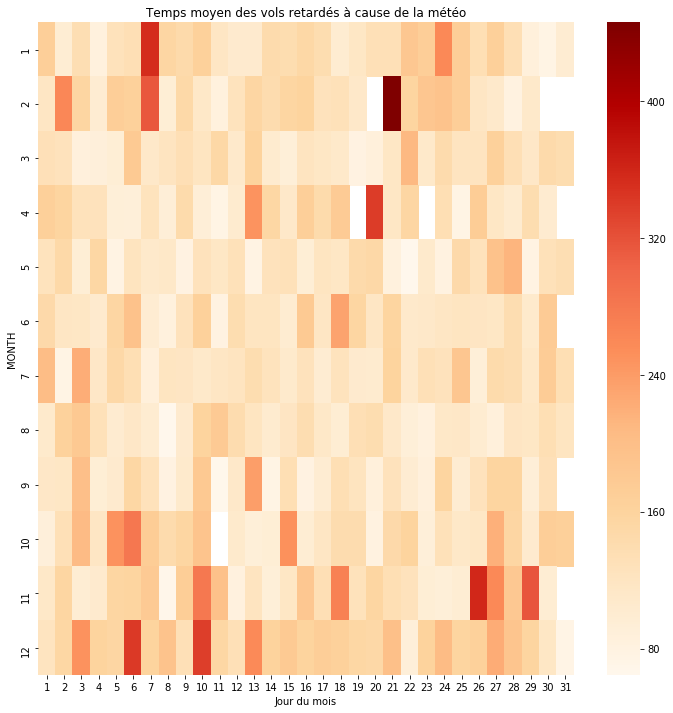

In [46]:
pivoted = meteo.groupby(["MONTH", "DAY_OF_MONTH"]).agg({
    "WEATHER_DELAY" : "mean"
})
pivoted = pivoted.reset_index().pivot_table(index="MONTH", columns="DAY_OF_MONTH")

pivoted.columns = list(range(1,32))
plt.figure(figsize=(12,12))
correlation_matrix = pivoted
sns.heatmap(correlation_matrix, cmap="OrRd")
plt.title("Temps moyen des vols retardés à cause de la météo")
plt.xlabel("Jour du mois")
plt.savefig("img/weather_delay_mean.png")
plt.show()

In [19]:
# print(test.info())
# print(test01.info())
for x, y in zip(list(test), list(test01)):
    print(test[x].dtype, test01[y].dtype)

object int64
object int64
int64 int64
object int64
object int64
object object
object object
int64 int64
object object
object object
object int64
object int64
int64 int64
object int64
object object
object object
object object
float64 int64
object object
object int64
object int64
object int64
object int64
object object
object object
object object
float64 int64
object object
float64 int64
float64 int64
object float64
float64 float64
float64 float64
float64 float64
float64 float64
object object
object float64
float64 float64
float64 float64
float64 float64
float64 int64
object float64
float64 float64
float64 float64
float64 float64
float64 float64
object object
float64 float64
object object
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64
float64 int64
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64
float64 float64


In [3]:
df.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


In [4]:
df.tail(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
460944,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7703A,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460945,2016,4,12,31,6,2016-12-31,WN,19393,WN,N7815L,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460946,2016,4,12,31,6,2016-12-31,WN,19393,WN,N967WN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460947,2016,4,12,31,6,2016-12-31,WN,19393,WN,N271LV,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460948,2016,4,12,31,6,2016-12-31,WN,19393,WN,N762SW,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5635978 entries, 0 to 460948
Data columns (total 65 columns):
YEAR                     object
QUARTER                  object
MONTH                    int64
DAY_OF_MONTH             object
DAY_OF_WEEK              object
FL_DATE                  object
UNIQUE_CARRIER           object
AIRLINE_ID               int64
CARRIER                  object
TAIL_NUM                 object
FL_NUM                   object
ORIGIN_AIRPORT_ID        object
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    object
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_FIPS        float64
ORIGIN_STATE_NM          object
ORIGIN_WAC               object
DEST_AIRPORT_ID          object
DEST_AIRPORT_SEQ_ID      object
DEST_CITY_MARKET_ID      object
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_FIPS          float64
DEST_STATE_NM            

In [6]:
df.describe()

,MONTH,AIRLINE_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_STATE_FIPS,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
count,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.635978e+06,5.572439e+06,5.572439e+06,5.572438e+06,...,5.635973e+06,968440.000000,968440.000000,968440.000000,968440.000000,968440.000000,34533.000000,34533.000000,34533.000000,0.0
mean,6.510400e+00,1.990272e+04,1.267619e+06,2.570476e+01,2.570177e+01,5.573331e+01,1.331097e+03,8.981658e+00,1.190612e+01,1.723490e-01,...,3.864900e+00,20.301263,2.709674,14.697945,0.085111,24.339327,1328.282252,35.485072,34.968407,NaN
std,9.231540e+00,5.736427e+02,1.535734e+05,2.139670e+01,1.664150e+01,2.697536e+01,4.894508e+02,3.981842e+01,3.878355e+01,7.129725e-01,...,2.431485e+00,57.451040,21.434164,30.567764,2.426291,45.941604,503.640838,31.122975,30.092505,NaN
min,1.000000e+00,1.939300e+04,1.300000e+01,-9.000000e+00,-3.000000e+00,0.000000e+00,-1.000000e+00,-2.040000e+02,0.000000e+00,0.000000e+00,...,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,3.000000e+00,1.979000e+04,1.129202e+06,1.200000e+01,1.200000e+01,3.400000e+01,9.150000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,858.000000,16.000000,16.000000,NaN
50%,7.000000e+00,1.980500e+04,1.288903e+06,2.400000e+01,2.400000e+01,5.200000e+01,1.325000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e+00,2.000000,0.000000,2.000000,0.000000,2.000000,1348.000000,26.000000,26.000000,NaN
75%,9.000000e+00,2.030400e+04,1.402702e+06,4.000000e+01,4.000000e+01,8.200000e+01,1.735000e+03,6.000000e+00,6.000000e+00,0.000000e+00,...,5.000000e+00,18.000000,0.000000,19.000000,0.000000,30.000000,1734.000000,43.000000,42.000000,NaN
max,2.036600e+04,1.039705e+06,1.621801e+06,3.195300e+04,7.800000e+01,2.410000e+02,2.359000e+03,2.149000e+03,2.149000e+03,1.428000e+03,...,1.100000e+01,2142.000000,1157.000000,1446.000000,474.000000,1484.000000,2400.000000,335.000000,265.000000,NaN


# Cleanup Dataset

In [7]:
gen = (col for col in df)

generateur fait pour passer au travers de tous les champs sans exploser la taille du notebook

In [8]:
c = next(gen)
print(c)
df[c].value_counts()

YEAR


2016        5627786
2016           8191
16-03-04          1
Name: YEAR, dtype: int64

In [3]:
df.drop(["QUARTER", "YEAR", "FL_DATE"], axis=1, inplace=True)  # only day, date and month is enought

In [4]:
df.drop(["CARRIER", "AIRLINE_ID"], axis=1, inplace=True)  # not unique as explained on the website

In [5]:
for col in df:
    if col.startswith(("ORIGIN", "DEST")) and not col.endswith("AIRPORT_ID"):
        df.drop([col], axis=1, inplace=True) 

In [6]:
df.drop(["DEP_TIME", "DEP_DELAY_NEW", "DEP_DEL15", "DEP_DELAY_GROUP", "DEP_TIME_BLK"], axis=1, inplace=True)
df.drop(["ARR_TIME", "ARR_DELAY_NEW", "ARR_DEL15", "ARR_DELAY_GROUP", "ARR_TIME_BLK"], axis=1, inplace=True)
df.drop(["AIR_TIME", "FLIGHTS", "DISTANCE_GROUP"], axis=1, inplace=True)
df.drop(["FIRST_DEP_TIME", "TOTAL_ADD_GTIME", "LONGEST_ADD_GTIME"], axis=1, inplace=True)

In [7]:
def hhmm_to_min(x):
    if not pd.isnull(x):
        x = int(x)
        if x <= 59:
            return x
        else:
            x = str(x)
            h, m = x[:-2], x[-2:]
            return int(h)*60 + int(m)

# print(hhmm_to_min(1))
# print(hhmm_to_min(59))
# print(hhmm_to_min(100))
# print(hhmm_to_min(1030))
# print(hhmm_to_min(2359))

df["CRS_DEP_TIME"] = df["CRS_DEP_TIME"].apply(lambda x:hhmm_to_min(x))
df["CRS_ARR_TIME"] = df["CRS_ARR_TIME"].apply(lambda x:hhmm_to_min(x))
# df["WHEELS_OFF"] = df["WHEELS_OFF"].apply(lambda x:hhmm_to_min(x))
# df["WHEELS_ON"] = df["WHEELS_ON"].apply(lambda x:hhmm_to_min(x))

In [8]:
df.drop(["TAIL_NUM", "FL_NUM", "TAXI_OUT", "WHEELS_OFF", "WHEELS_ON", "TAXI_IN", "ACTUAL_ELAPSED_TIME"], axis=1, inplace=True)

## Only to fix issues created by the merge

In [9]:
df = df[df["MONTH"]<13]  #to remove the wrong line
df = df[df["CANCELLED"]<2]

In [10]:
col = list(df)
df.drop([col[-1] ], axis=1, inplace=True)

In [13]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,5.635973e+06,5.635973e+06,5.635973e+06,5.635973e+06,5.635973e+06,5.635973e+06,5.572435e+06,5.635973e+06,5.556195e+06,5.635973e+06,5.635973e+06,5.635967e+06,5.635973e+06,968440.000000,968440.000000,968440.000000,968440.000000,968440.000000
mean,6.506789e+00,1.583258e+01,3.929674e+00,1.267617e+04,1.267584e+04,8.094108e+02,8.981375e+00,9.062659e+02,3.536409e+00,1.170570e-02,2.449444e-03,1.452144e+02,8.482616e+02,20.301263,2.709674,14.697945,0.085111,24.339327
std,3.416782e+00,8.796087e+00,1.985030e+00,1.535718e+03,1.535391e+03,2.944087e+02,3.981261e+01,3.098278e+02,4.192246e+01,1.075578e-01,4.943121e-02,7.630092e+01,6.183001e+02,57.451040,21.434164,30.567764,2.426291,45.941604
min,1.000000e+00,1.000000e+00,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,-2.040000e+02,1.000000e+00,-1.520000e+02,0.000000e+00,0.000000e+00,5.000000e+00,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.129200e+04,1.129200e+04,5.550000e+02,-5.000000e+00,6.650000e+02,-1.400000e+01,0.000000e+00,0.000000e+00,8.800000e+01,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000e+00,1.600000e+01,4.000000e+00,1.288900e+04,1.288900e+04,8.050000e+02,-2.000000e+00,9.200000e+02,-6.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02,6.780000e+02,2.000000,0.000000,2.000000,0.000000,2.000000
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.402700e+04,1.402700e+04,1.055000e+03,6.000000e+00,1.160000e+03,6.000000e+00,0.000000e+00,0.000000e+00,1.780000e+02,1.090000e+03,18.000000,0.000000,19.000000,0.000000,30.000000
max,1.200000e+01,3.100000e+01,7.000000e+00,1.621800e+04,1.621800e+04,1.439000e+03,2.149000e+03,1.440000e+03,2.142000e+03,1.000000e+00,1.000000e+00,7.050000e+02,4.983000e+03,2142.000000,1157.000000,1446.000000,474.000000,1484.000000


In [18]:
df[df["DEP_DELAY"].isnull()]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
72,1,16,6,AA,14747,12478,400,NaN,901.0,NaN,1.0,A,0.0,321.0,2422.0,NaN,NaN,NaN,NaN,NaN
79,1,23,6,AA,14747,12478,400,NaN,901.0,NaN,1.0,B,0.0,321.0,2422.0,NaN,NaN,NaN,NaN,NaN
80,1,24,7,AA,14747,12478,405,NaN,906.0,NaN,1.0,B,0.0,321.0,2422.0,NaN,NaN,NaN,NaN,NaN
81,1,25,1,AA,14747,12478,405,NaN,906.0,NaN,1.0,B,0.0,321.0,2422.0,NaN,NaN,NaN,NaN,NaN
102,1,15,5,AA,12478,14747,1110,NaN,1312.0,NaN,1.0,A,0.0,382.0,2422.0,NaN,NaN,NaN,NaN,NaN
110,1,23,6,AA,12478,14747,1110,NaN,1312.0,NaN,1.0,B,0.0,382.0,2422.0,NaN,NaN,NaN,NaN,NaN
111,1,24,7,AA,12478,14747,1110,NaN,1312.0,NaN,1.0,B,0.0,382.0,2422.0,NaN,NaN,NaN,NaN,NaN
112,1,25,1,AA,12478,14747,1100,NaN,1302.0,NaN,1.0,B,0.0,382.0,2422.0,NaN,NaN,NaN,NaN,NaN
189,1,7,4,AA,15016,11298,850,NaN,964.0,NaN,1.0,A,0.0,114.0,550.0,NaN,NaN,NaN,NaN,NaN
260,1,22,5,AA,12892,11278,795,NaN,1270.0,NaN,1.0,B,0.0,295.0,2311.0,NaN,NaN,NaN,NaN,NaN


In [20]:
to_convert = ["DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID", "DEP_DELAY", "CRS_ARR_TIME", "ARR_DELAY"]
for col in to_convert:
    df[col] = df[col].fillna(0).astype("int")

In [18]:
#df2 = df.copy()

In [19]:
#df["SECURITY_DELAY"].value_counts()

In [21]:
# We cannot predict this events
non_predictible_reasons = ["CANCELLED", "DIVERTED"]  #"WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"
for reason in non_predictible_reasons:
    df = df[df[reason]==0]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556195 entries, 0 to 460948
Data columns (total 20 columns):
MONTH                  int64
DAY_OF_MONTH           int32
DAY_OF_WEEK            int32
UNIQUE_CARRIER         object
ORIGIN_AIRPORT_ID      int32
DEST_AIRPORT_ID        int32
CRS_DEP_TIME           int64
DEP_DELAY              int32
CRS_ARR_TIME           int32
ARR_DELAY              int32
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
CRS_ELAPSED_TIME       float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtypes: float64(9), int32(7), int64(2), object(2)
memory usage: 741.8+ MB


On limite les ligne à celle dont la meteo ou la securité n'a pas impacté plus d'une heure. Au dela c'est un cas exceptionnel (terrorisme, tempêtes, ...). Jusqu'a 1h cela peut se comprendre (grêle, neige, controle de securité, alert a la bombe). On ne prend pas le delai de la compagnie car c'est le travail de la compagnie d'être a l'heure

In [23]:
semi_predictible_reasons = ["WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]  #
for reason in semi_predictible_reasons:
    df = df[(df[reason]<60) | (df[reason].isnull())]

In [24]:
df.drop(["DIVERTED", "CANCELLED", "DISTANCE", "CRS_ELAPSED_TIME", "CANCELLATION_CODE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"] , axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368859 entries, 0 to 460948
Data columns (total 10 columns):
MONTH                int64
DAY_OF_MONTH         int32
DAY_OF_WEEK          int32
UNIQUE_CARRIER       object
ORIGIN_AIRPORT_ID    int32
DEST_AIRPORT_ID      int32
CRS_DEP_TIME         int64
DEP_DELAY            int32
CRS_ARR_TIME         int32
ARR_DELAY            int32
dtypes: int32(7), int64(2), object(1)
memory usage: 307.2+ MB


In [25]:
df.to_csv("merged_dataset.csv")